In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('../input/heart.csv')

## EDA

**Checking the head**

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


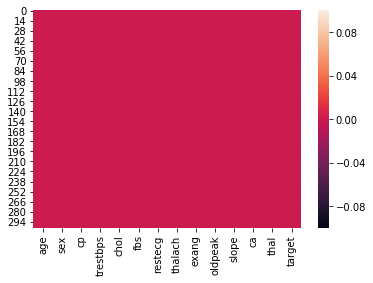

In [10]:
sns.heatmap(dataset.isnull())

**From the above plot it is clear that there is no null values**

In [16]:
dataset['sex'] = dataset['sex'].apply(lambda x:'Male' if x == 0 else 'Female')

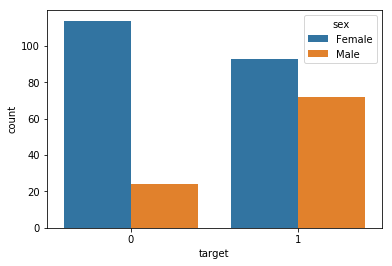

In [19]:
sns.countplot(x = 'target',data = dataset,hue = 'sex')

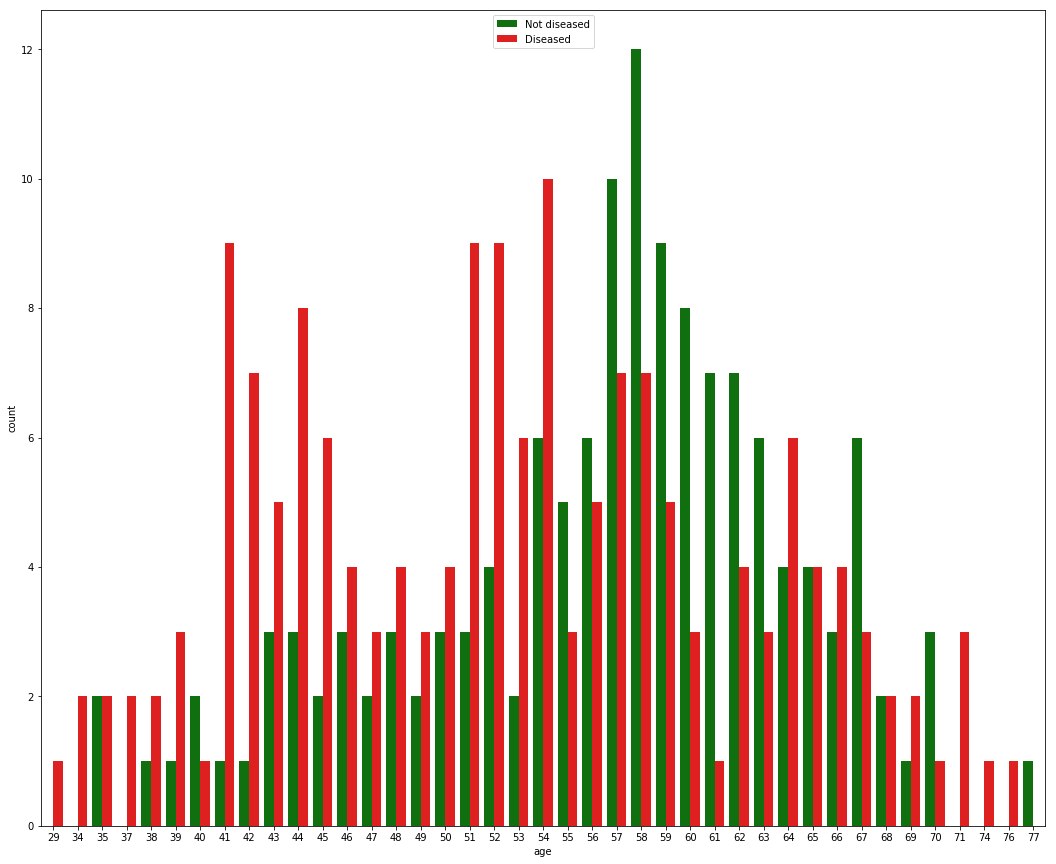

In [28]:
plt.figure(figsize = (18,15))
sns.countplot(x = 'age',hue = 'target',data = dataset,palette = ['green','red'])
plt.legend(["Not diseased","Diseased"])

Text(0, 0.5, 'Maximum Heart Rate')

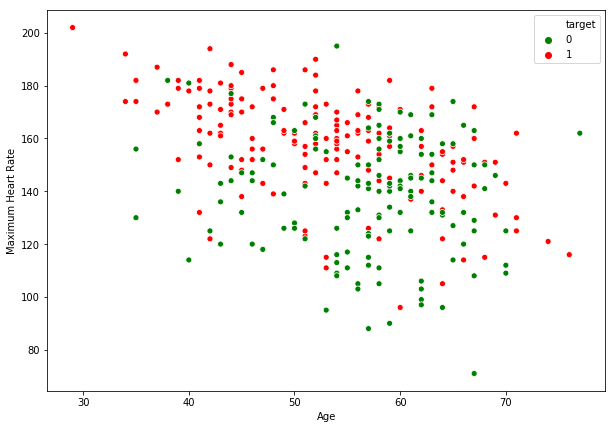

In [43]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'age',y = 'thalach',hue = 'target',data = dataset,palette = ['Green','Red'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

In [42]:
round(dataset[dataset['target'] == 1]['age'].mean())

52

**Thus the avergae age of getting heart disease is 52**

## Machine learning

In [44]:
dataset['sex'] = dataset['sex'].apply(lambda x:0 if x == 'Male' else 1)

In [45]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [49]:
scaler = StandardScaler()

In [50]:
x = dataset.drop('target',axis = 1)
y = dataset['target']
x = scaler.fit_transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [212]:
class classifier:
    def __init__(self,model,x,y):
        self.model = model
        self.x = x
        self.y = y
        self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(x,y,test_size = 0.3,random_state = 17)
        self.model.fit(self.x_train,self.y_train)
        self.y_pred = self.model.predict(self.x_test)
    def confusionmatrix(self):
        cm = confusion_matrix(self.y_test,self.y_pred)
        plt.figure(figsize=(7,7))
        sns.heatmap(cm,square = True,annot = True,cbar = False,
                   xticklabels = ['Not Diseased','Diseased'],
                   yticklabels = ['Not Diseased','Diseased'])
        plt.title('Confusion Matrix')
        plt.xlabel('Prediction')
        plt.ylabel('True Values')
    def classificationreport(self):
        print('Classification Report')
        print(classification_report(self.y_test,self.y_pred,target_names=['Not diseased','Diseased']))
    def accuracy(self):
        self.y_train_pred = self.model.predict(self.x_train)
        print('Accuracy Score')
        print('Training Accuracy --->',accuracy_score(self.y_train,self.y_train_pred))
        print('Testing Accuracy  --->',accuracy_score(self.y_test,self.y_pred))    
    def test_accuracy(self):
        return accuracy_score(self.y_test,self.y_pred)

### SVC

In [213]:
from sklearn.svm import SVC

In [214]:
svc = classifier(model = SVC(gamma = 'scale'),x = x,y = y)

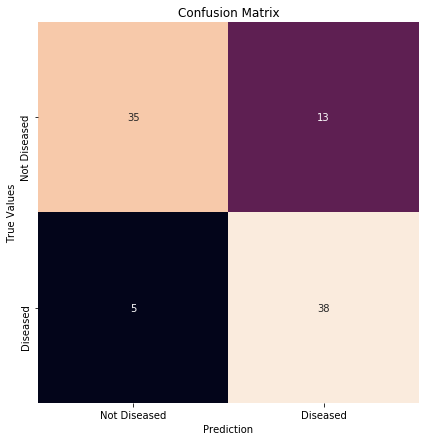

In [215]:
svc.confusionmatrix()

In [216]:
svc.classificationreport()

Classification Report
              precision    recall  f1-score   support

Not diseased       0.88      0.73      0.80        48
    Diseased       0.75      0.88      0.81        43

   micro avg       0.80      0.80      0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91



In [217]:
svc.accuracy()

Accuracy Score
Training Accuracy ---> 0.9292452830188679
Testing Accuracy  ---> 0.8021978021978022


### Random Forest Classifier

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
rfc = classifier(model = RandomForestClassifier(n_estimators=700),x = x,y = y)

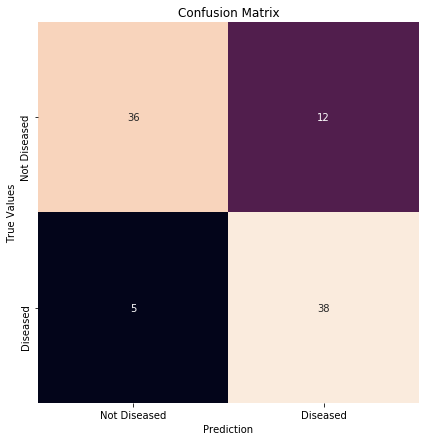

In [220]:
rfc.confusionmatrix()

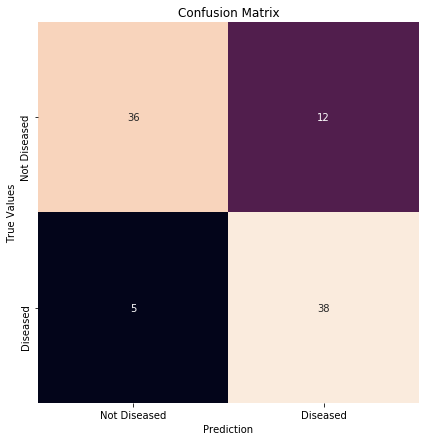

In [221]:
rfc.confusionmatrix()

In [222]:
rfc.accuracy()

Accuracy Score
Training Accuracy ---> 1.0
Testing Accuracy  ---> 0.8131868131868132


### Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
lr = classifier(model = LogisticRegression(solver = 'lbfgs'),x = x,y = y)

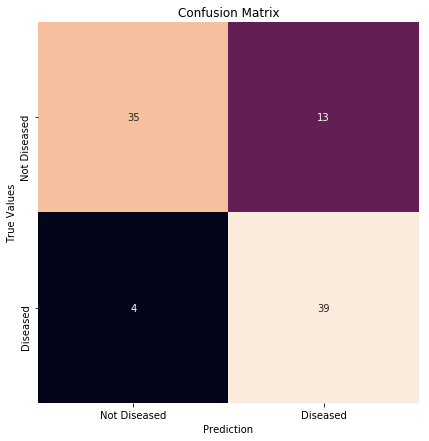

In [225]:
lr.confusionmatrix()

In [226]:
lr.classificationreport()


Classification Report
              precision    recall  f1-score   support

Not diseased       0.90      0.73      0.80        48
    Diseased       0.75      0.91      0.82        43

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [227]:
lr.accuracy()

Accuracy Score
Training Accuracy ---> 0.8584905660377359
Testing Accuracy  ---> 0.8131868131868132


### KNN

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
knn = classifier(model = KNeighborsClassifier(n_neighbors=105),x = x,y = y)

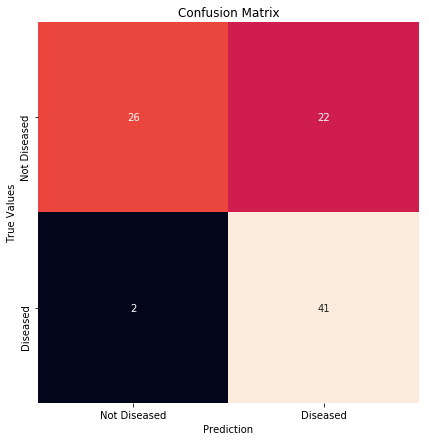

In [230]:
knn.confusionmatrix()

In [231]:
knn.classificationreport()

Classification Report
              precision    recall  f1-score   support

Not diseased       0.93      0.54      0.68        48
    Diseased       0.65      0.95      0.77        43

   micro avg       0.74      0.74      0.74        91
   macro avg       0.79      0.75      0.73        91
weighted avg       0.80      0.74      0.73        91



In [232]:
knn.accuracy()

Accuracy Score
Training Accuracy ---> 0.7924528301886793
Testing Accuracy  ---> 0.7362637362637363


In [233]:
models = [svc,rfc,lr,knn]
names = ['Support Vector Classifier','Random Forest Classifier','Logistic Regression','KNearestNeighbour']
acc = []
for model in models:
    acc.append(model.test_accuracy())

Text(0.5, 0, 'Classifiers')

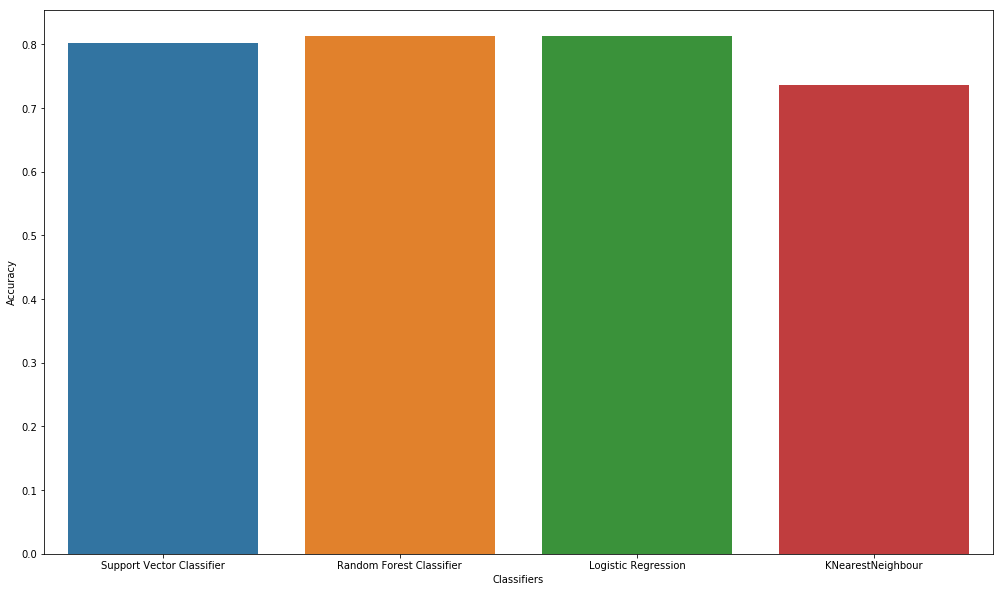

In [239]:
plt.figure(figsize=(17,10))
sns.barplot(x = names,y = acc)
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")